GARCH Volatility Forcasting

In [12]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [13]:
start = datetime(2000, 1, 1)
end = datetime(2024, 10, 8)

spy = yf.Ticker("SPY")
hst = spy.history(start=start, end=end)

returns = 100 * hst.Close.pct_change().dropna()

In [14]:
# Calculate the rolling standard deviation (volatility)
volatility = np.sqrt(returns.rolling(window=7).var())

In [15]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 119204.32266800603
Iteration:      2,   Func. Count:     21,   Neg. LLF: 36236.90017241768
Iteration:      3,   Func. Count:     32,   Neg. LLF: 13177.816698349328
Iteration:      4,   Func. Count:     41,   Neg. LLF: 11483.673202282469
Iteration:      5,   Func. Count:     50,   Neg. LLF: 8743.431782497591
Iteration:      6,   Func. Count:     58,   Neg. LLF: 8558.629790562896
Iteration:      7,   Func. Count:     66,   Neg. LLF: 8559.736085499288
Iteration:      8,   Func. Count:     74,   Neg. LLF: 8616.085381343677
Iteration:      9,   Func. Count:     83,   Neg. LLF: 8553.519935973254
Iteration:     10,   Func. Count:     91,   Neg. LLF: 8553.444918925525
Iteration:     11,   Func. Count:     98,   Neg. LLF: 8553.444731589161
Iteration:     12,   Func. Count:    105,   Neg. LLF: 8553.444717440309
Iteration:     13,   Func. Count:    111,   Neg. LLF: 8553.444717439603
Optimization terminated successfully    (Exit mode 0)
       

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8553.44
Distribution:                  Normal   AIC:                           17118.9
Method:            Maximum Likelihood   BIC:                           17159.3
                                        No. Observations:                 6229
Date:                Thu, Oct 10 2024   Df Residuals:                     6228
Time:                        00:23:08   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0751  1.016e-02      7.390  1.469e-13 [5.519e-02,9.503e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0427  9.521e-03      4.489  7.140e-06 [2.408e-02,6.140e-02]
alpha[1]       0.0857  2.185e-02      3.925  8.670e-05   [4.293e-02,  0.129]
alpha[2]       0.1314  2.482e-02      5.296  1.186e-07   [8.278e-02,  0.180]
beta[1]        0.2165      0.283      0.766      0.443     [ -0.337,  0.770]
beta[2]        0.5347      0.251      2.131  3.310e-02   [4.288e-02,  1.027]
============================================================================

Covariance estimator: robust
"""

Fit Model

In [16]:
test_size = 365*5
for i in range(test_size):
    train = returns[:-9 - test_size]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=8)
    pred = pd.Series(np.sqrt(pred.variance.values)[0], index=returns.index[-8:])




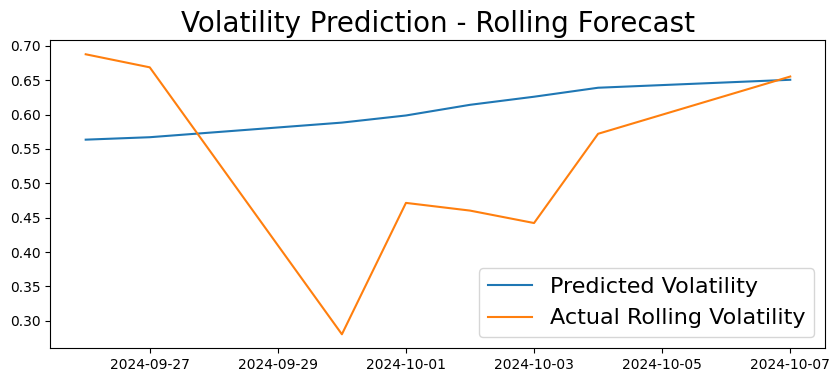

In [17]:
plt.figure(figsize=(10,4))
preds, = plt.plot(pred)
vol, = plt.plot(volatility[-8:])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['Predicted Volatility', 'Actual Rolling Volatility'], fontsize=16)